# Loan Processing Model

In [1569]:
import os
print(os.getcwd())

/Users/harianshsehgal/Development/induction_project/notebooks


In [1570]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1571]:
file_path = '/Users/harianshsehgal/Development/induction_project/data/Modeling dataset.csv'
df = pd.read_csv(file_path)
df.head()


,id,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,earliest_cr_line,purpose,desc,loan_status
0,1002603,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,7/18/1990 3:54,debt_consolidation,NaN,Current
1,1024806,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,10/7/1983 8:46,debt_consolidation,Borrower added on 11/09/11 > This loan is fo...,Fully Paid
2,663413,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,4/7/1992 11:32,credit_card,Borrower added on 01/28/11 > pay off credit ...,Fully Paid
3,810093,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,1/21/2003 2:40,other,Borrower added on 07/11/11 > I have been con...,Current
4,865474,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,9/8/1997 7:19,debt_consolidation,NaN,Fully Paid


In [1572]:
df = df.drop_duplicates()

In [1573]:
print(df.columns)

Index(['id', 'loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'earliest_cr_line', 'purpose', 'desc', 'loan_status'],
      dtype='object')


# Adding new features

In [1575]:
df['dti'] = df['loan_amnt'] / df['annual_inc']

In [1576]:

from datetime import datetime

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')

# Calculating age of credit line in years
now = datetime.now()
df['credit_age'] = (now - df['earliest_cr_line']).dt.days / 365.25

print(df.head())

        id  loan_amnt  emp_length  annual_inc  delinq_2yrs  inq_last_6mths  \
0  1002603      30000           1     93000.0            0               1   
1  1024806      22000           6     70000.0            1               0   
2   663413       3700          10    117000.0            1               1   
3   810093       7600           1     33996.0            0               0   
4   865474      12000           7     75000.0            0               1   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     120                     130        10        0   
1                      10                     130        11        0   
2                      10                     130         9        0   
3                     120                     130        10        0   
4                      24                     130        13        0   

   revol_bal  revol_util  total_acc    earliest_cr_line             purpose  \
0      43209       

# Converting the discrete “purpose” and "loan status" fields into binary fields

In [1578]:
unique_purposes = df['purpose'].unique()
print("unique_purposes: ", unique_purposes)

unique_purposes:  ['debt_consolidation' 'credit_card' 'other' 'home_improvement'
 'small_business' 'major_purchase' 'car' 'wedding' 'medical' 'house'
 'moving' 'vacation' 'educational' 'renewable_energy']


In [1579]:
unique_loan_status = df['loan_status'].unique()
print("unique_loan_status: ", unique_loan_status)

unique_loan_status:  ['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default']


In [1580]:
loan_status_mapping = {
    'Current': 1,
    'Fully Paid': 1,
    'In Grace Period': 1,
    'Late (16-30 days)': 0,
    'Charged Off': 0,
    'Late (31-120 days)': 0,
    'Default': 0
}

df['loan_status'] = df['loan_status'].map(loan_status_mapping)
df['loan_status'] = df['loan_status'].fillna(-1).astype(int)

print(df['loan_status'].head())

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64


In [1581]:
purpose_loan_status = df.groupby(['purpose', 'loan_status'])['loan_status'].count().unstack().fillna(0)
# print(purpose_loan_status)

# calculating the percentage of loan status paid by categories in purposes , loan status 1 means paid, 0 means not paid
purpose_totals = purpose_loan_status.sum(axis=1)
percentage_paid = purpose_loan_status[1] / purpose_totals * 100

# Sort the percentages in ascending order
sorted_percentages = percentage_paid.sort_values()

# Print the sorted results
print(sorted_percentages)

purpose
small_business        74.193548
renewable_energy      78.787879
educational           79.807692
moving                83.544304
medical               84.579439
other                 85.445626
house                 85.714286
debt_consolidation    86.790227
vacation              87.068966
car                   88.270378
home_improvement      88.568486
credit_card           90.494541
major_purchase        90.620491
wedding               91.082803
dtype: float64


In [1582]:
# keeping cut off percentage as 85%
purpose_mapping = {
    'small_business':0,
    'educational':0,
    'renewable_energy':0,
    'medical':0,
    'moving':0,
    'other':1,
    'vacation':1,
    'debt_consolidation':1,
    'house':1,
    'car':1,
    'home_improvement':1,
    'major_purchase':1,
    'credit_card':1,
    'wedding':1
}
# Replacing text fields with numbers
df['purpose'] = df['purpose'].map(purpose_mapping)
# .infer_objects(copy=False)
df['purpose'] = df['purpose'].fillna(-1).astype(int)

print(df['purpose'].head())

0    1
1    1
2    1
3    1
4    1
Name: purpose, dtype: int64


In [1583]:
print(list(df.columns))

['id', 'loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'earliest_cr_line', 'purpose', 'desc', 'loan_status', 'dti', 'credit_age']


In [1584]:
df.head()

,id,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,earliest_cr_line,purpose,desc,loan_status,dti,credit_age
0,1002603,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,1990-07-18 03:54:00,1,NaN,1,0.322581,34.039699
1,1024806,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,1983-10-07 08:46:00,1,Borrower added on 11/09/11 > This loan is fo...,1,0.314286,40.818617
2,663413,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,1992-04-07 11:32:00,1,Borrower added on 01/28/11 > pay off credit ...,1,0.031624,32.317591
3,810093,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,2003-01-21 02:40:00,1,Borrower added on 07/11/11 > I have been con...,1,0.223556,21.527721
4,865474,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,1997-09-08 07:19:00,1,NaN,1,0.160000,26.896646


# handle description

In [1586]:
from wordcloud import WordCloud
from collections import Counter
import re

In [1587]:
df['desc'] = df['desc'].astype(str)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing to the 'desc' column
df['cleaned_desc'] = df['desc'].apply(preprocess_text)

In [1588]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harianshsehgal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harianshsehgal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1589]:
from nltk.corpus import stopwords

# Get stop words list
stop_words = set(stopwords.words('english'))

# Tokenize and remove stop words
def remove_stop_words(text):
    tokens = text.split()  # Tokenize by splitting on whitespace
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['filtered_desc'] = df['cleaned_desc'].apply(remove_stop_words)


In [1590]:
# Combine all filtered descriptions into a single string
all_filtered_text = ' '.join(df['filtered_desc'])

# Tokenize words
tokens = all_filtered_text.split()

# Count word frequencies
word_freq = Counter(tokens)

# Convert to DataFrame for easier plotting
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

In [1591]:
print(top_words)

        Word  Frequency
2      added       9751
1   borrower       9569
4       loan       7729
21    credit       7451
17       pay       5657


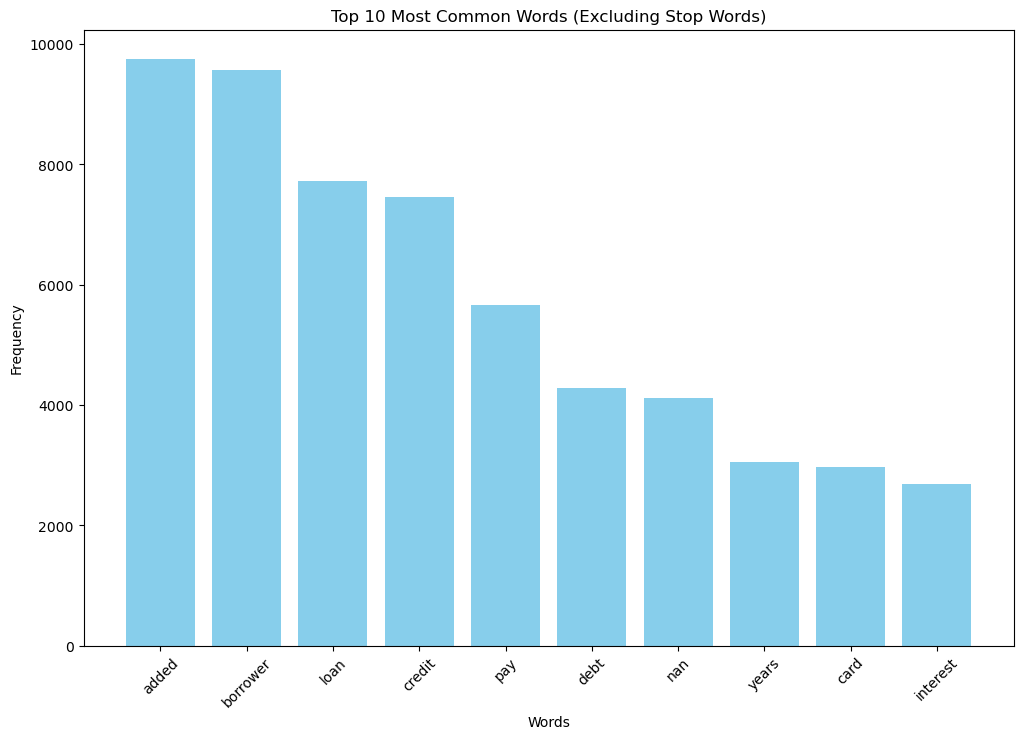

In [1637]:
# Plot top words
plt.figure(figsize=(12, 8))
top_words = word_freq_df.head(10)  # Top 5 most common words
plt.bar(top_words['Word'], top_words['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words (Excluding Stop Words)')
plt.xticks(rotation=45)
plt.show()

In [1593]:
top_words_list = top_words['Word'].tolist()
print(top_words_list)

['added', 'borrower', 'loan', 'credit', 'pay']


In [1594]:
df.columns

Index(['id', 'loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'earliest_cr_line', 'purpose', 'desc', 'loan_status', 'dti',
       'credit_age', 'cleaned_desc', 'filtered_desc'],
      dtype='object')

In [1595]:
# Create indicator columns for top words
for word in top_words_list:
    df[word] = df['filtered_desc'].apply(lambda x: 1 if word in x.split() else 0)

print(df.columns)

Index(['id', 'loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'earliest_cr_line', 'purpose', 'desc', 'loan_status', 'dti',
       'credit_age', 'cleaned_desc', 'filtered_desc', 'added', 'borrower',
       'loan', 'credit', 'pay'],
      dtype='object')


In [1596]:
# Drop columns
columns_to_drop = ['id','cleaned_desc','filtered_desc','desc','earliest_cr_line']
df = df.drop(columns=columns_to_drop)
print(list(df.columns))

['loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'purpose', 'loan_status', 'dti', 'credit_age', 'added', 'borrower', 'loan', 'credit', 'pay']


In [1598]:
from sklearn.model_selection import train_test_split

y = df['loan_status']  
X = df.drop(['loan_status'], axis=1)  

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

num_variables = ['loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'dti','credit_age']
print('X_train.columns: ', X_train.columns)
print('num_variables: ',num_variables)


X_train.columns:  Index(['loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'purpose', 'dti', 'credit_age', 'added', 'borrower', 'loan', 'credit',
       'pay'],
      dtype='object')
num_variables:  ['loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'dti', 'credit_age']


### Scaling

In [1531]:
# Scaling
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[num_variables] = scaler.fit_transform(X_train[num_variables])
# Transform the test data using the same scaler
X_test[num_variables] = scaler.transform(X_test[num_variables])

In [1532]:
# Mean of each feature
means = scaler.mean_  
# Standard deviation of each feature
scales = scaler.scale_  
for var, mean, scale in zip(num_variables, means, scales):
    print(f"Feature: {var}, Mean: {mean:.2f}, Scale: {scale:.2f}")

Feature: loan_amnt, Mean: 11186.92, Scale: 7424.98
Feature: emp_length, Mean: 5.03, Scale: 3.36
Feature: annual_inc, Mean: 68105.31, Scale: 52014.56
Feature: delinq_2yrs, Mean: 0.15, Scale: 0.48
Feature: inq_last_6mths, Mean: 0.87, Scale: 1.06
Feature: mths_since_last_delinq, Mean: 90.19, Scale: 42.22
Feature: mths_since_last_record, Mean: 126.01, Scale: 18.59
Feature: open_acc, Mean: 9.32, Scale: 4.41
Feature: pub_rec, Mean: 0.06, Scale: 0.24
Feature: revol_bal, Mean: 13629.90, Scale: 16277.70
Feature: revol_util, Mean: 0.49, Scale: 0.28
Feature: total_acc, Mean: 22.20, Scale: 11.45
Feature: dti, Mean: 0.19, Scale: 0.12
Feature: credit_age, Mean: 27.49, Scale: 6.80


### Model building, hyperparameter tuning and threshold selection

In [1630]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Values to try for the regularization strength
}

#  Using GridSearchCV with LogisticRegression
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=2000, class_weight='balanced'),
    param_grid=param_grid,
    # scoring='roc_auc',
    scoring='f1_macro',
    cv=10,  #k folds             
    verbose=0,           
    n_jobs=-1            
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Generating predicted probabilities on the test set
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Optimizing threshold
thresholds = np.linspace(0, 1, 101)
best_f1_macro = 0
best_threshold = 0

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob > threshold).astype(int)
    f1_macro = f1_score(y_test, y_pred_threshold, average='macro')
    if f1_macro > best_f1_macro:
        best_f1_macro = f1_macro
        best_threshold = threshold

# Applying the best threshold to make final predictions
y_pred_best = (y_pred_prob > best_threshold).astype(int)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
classification_rep = classification_report(y_test, y_pred_best)

print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Cross-Validation Score: {grid_search.best_score_}")
print(f"Best Threshold: {best_threshold}")
print(f"Best Macro-Average F1 Score: {best_f1_macro}")
print(f"Test Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Best Parameters: {'C': 0.1}
Best Cross-Validation Score: 0.509151818159324
Best Threshold: 0.39
Best Macro-Average F1 Score: 0.5694580671385274
Test Accuracy: 0.8092315901814301

Confusion Matrix:
 [[ 118  390]
 [ 325 2915]]

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.23      0.25       508
           1       0.88      0.90      0.89      3240

    accuracy                           0.81      3748
   macro avg       0.57      0.57      0.57      3748
weighted avg       0.80      0.81      0.80      3748



In [1440]:
model.coef_  #coefficients

array([[-2.91221706e-05,  1.39256774e-03,  8.56201501e-06,
        -8.66516084e-02, -3.59233885e-01,  2.76727640e-03,
        -1.57936070e-03, -1.60603324e-02, -1.11302636e-01,
        -8.17229202e-06, -2.57018980e-01,  1.85940807e-02,
         2.10111678e-01, -1.66121271e-02, -4.78232625e-03,
        -1.26739806e-02, -2.16543672e-02,  5.16694114e-02,
         1.83890277e-01, -1.35021710e-02]])

In [1441]:
model.coef_[0][1]

0.0013925677382335545

In [1485]:
intercept_val= model.intercept_[0]  # intercept

In [1487]:
print("intercept value: ",intercept_val)

intercept value:  -0.03214149408297314


In [1443]:
#coefficients
coefficients = model.coef_[0] 
feature_names = X_train.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print(coef_df)

                   Feature  Coefficient
0                loan_amnt    -0.000029
1               emp_length     0.001393
2               annual_inc     0.000009
3              delinq_2yrs    -0.086652
4           inq_last_6mths    -0.359234
5   mths_since_last_delinq     0.002767
6   mths_since_last_record    -0.001579
7                 open_acc    -0.016060
8                  pub_rec    -0.111303
9                revol_bal    -0.000008
10              revol_util    -0.257019
11               total_acc     0.018594
12                 purpose     0.210112
13                     dti    -0.016612
14              credit_age    -0.004782
15                   added    -0.012674
16                borrower    -0.021654
17                    loan     0.051669
18                  credit     0.183890
19                     pay    -0.013502


In [1483]:
cutoff_credit_score =best_threshold*1000
print('cutoff_credit_score: ', cutoff_credit_score)

cutoff_credit_score:  390.0
